In [8]:
import numpy as np
import pandas as pd


def load_dual_series_csv(file_path):
    """
    Načte CSV soubor, kde jsou 2 řádky a střídající se sloupce patří různým řadám.

    Vrací:
        A1, A2, B1, B2 : numpy.ndarray
            A1 - sudé sloupce z 1. řádku
            A2 - liché sloupce z 1. řádku
            B1 - sudé sloupce z 2. řádku
            B2 - liché sloupce z 2. řádku
    """
    df = pd.read_csv(file_path, header=None)

    row_0 = df.iloc[0].to_numpy()
    row_1 = df.iloc[1].to_numpy()

    A1 = row_0[::2]
    A2 = row_0[1::2]
    B1 = row_1[::2]
    B2 = row_1[1::2]

    return A1, A2, B1, B2




In [16]:
import matplotlib.pyplot as plt

def plot_series(*series, labels=None, title="Visualization", x_label = "index", y_label = "value"):

    plt.figure(figsize=(12, 6))

    for idx, s in enumerate(series):
        label = labels[idx] if labels and idx < len(labels) else f"Řada {idx+1}"
        plt.plot(s, label=label)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



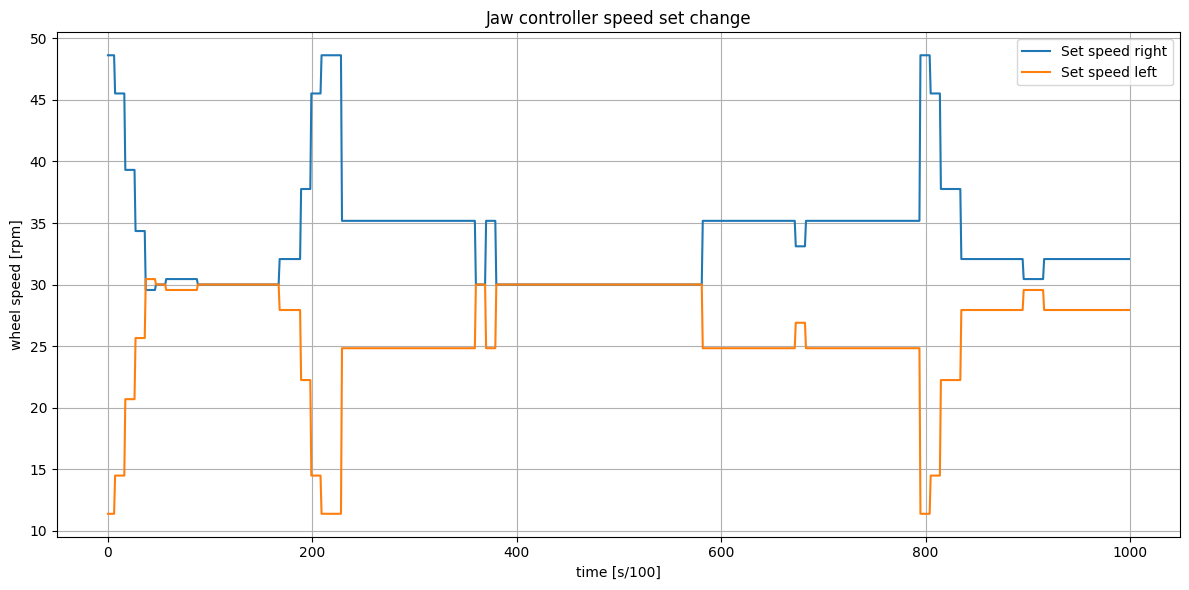

In [23]:
A1, A2, B1, B2 = load_dual_series_csv("../measured_data/jaw_controller.csv")
plot_series(A1, A2, labels=["Set speed right", "Set speed left", "B1", "B2"], title="Jaw controller speed set change",x_label = "time [s/100]", y_label = "wheel speed [rpm]" )

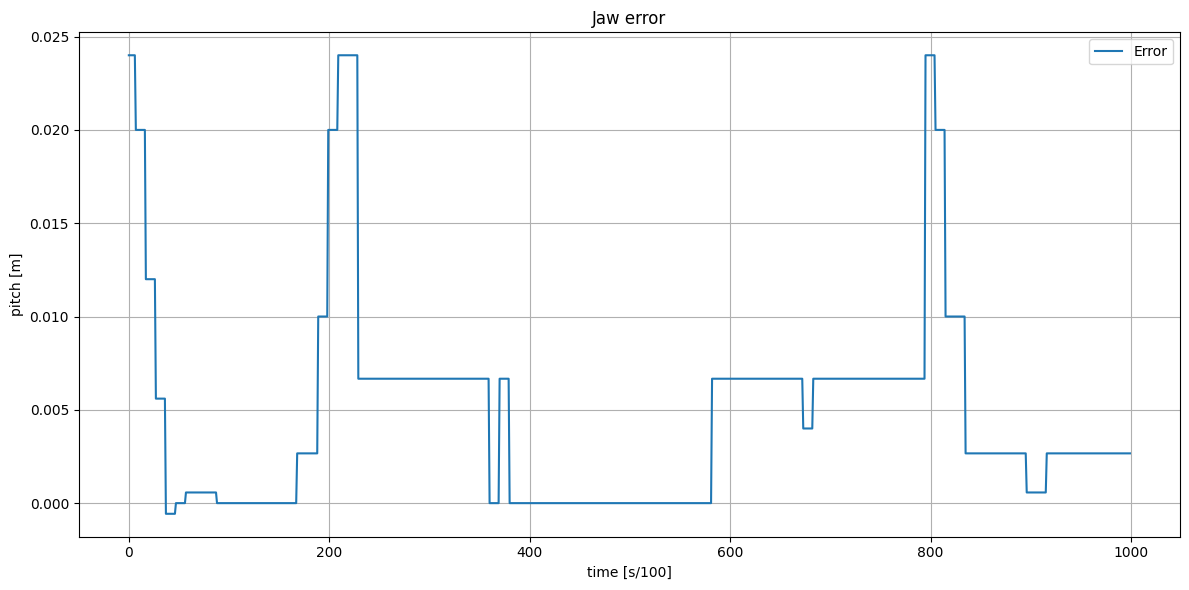

In [24]:
plot_series(B1, labels=["Error", "B1"], title="Jaw error",x_label = "time [s/100]", y_label = "pitch [m]")

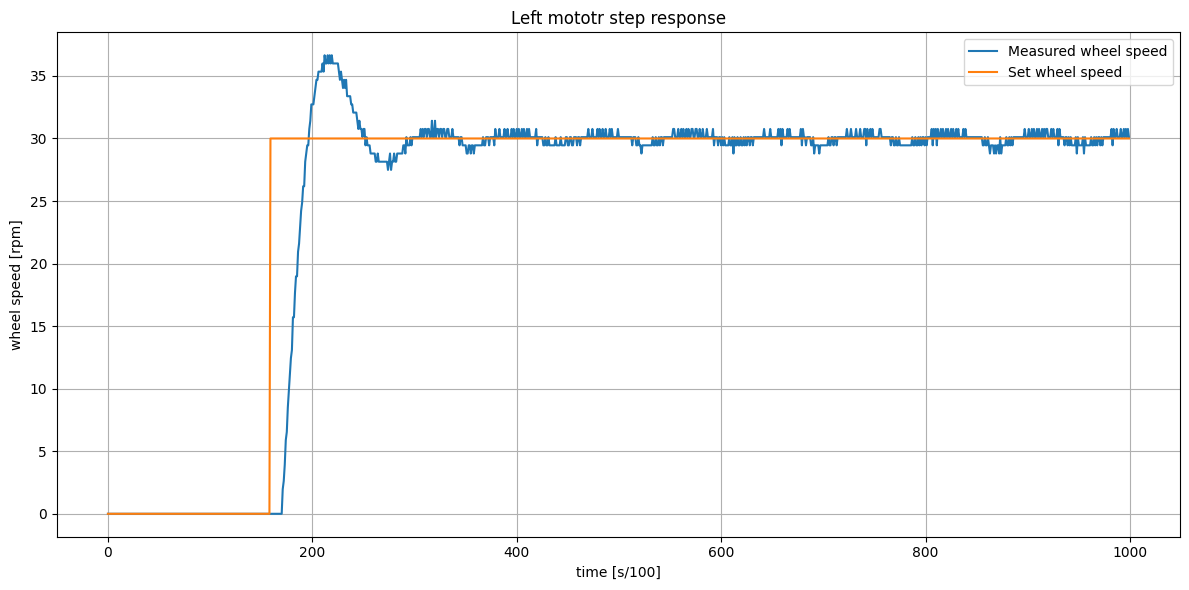

In [28]:
A1, A2, B1, B2 = load_dual_series_csv("../measured_data/left_motor_step.csv")
plot_series(A1, A2, labels=["Measured wheel speed", "Set wheel speed ", "B1", "B2"], title="Left mototr step response",x_label = "time [s/100]", y_label = "wheel speed [rpm]" )

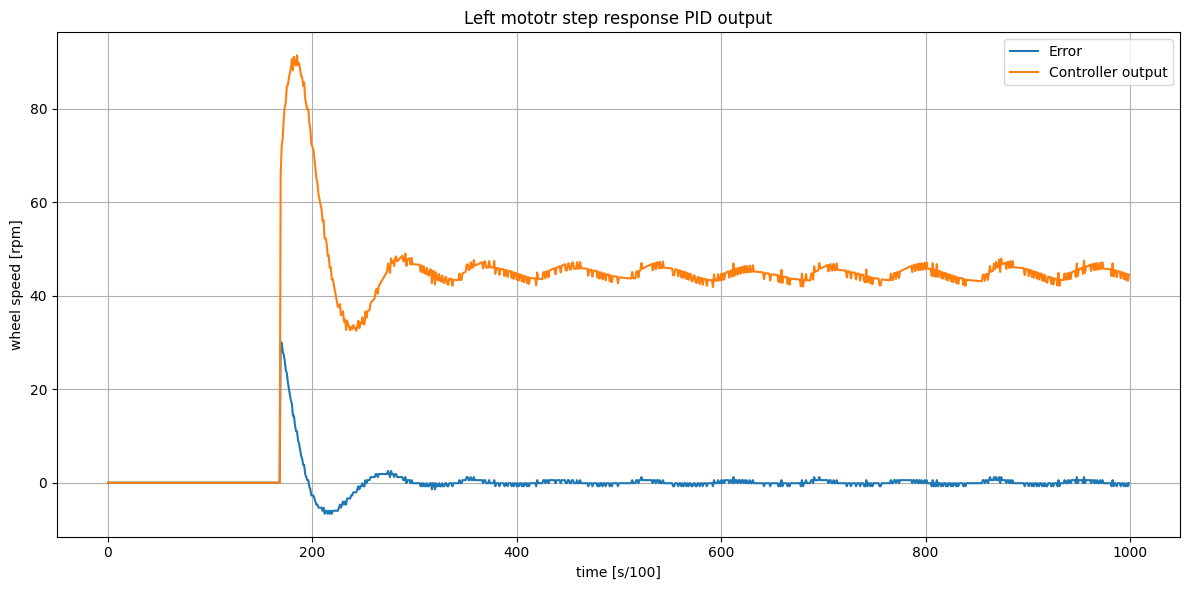

In [30]:
plot_series(B1, B2, labels=["Error", "Controller output"], title="Left mototr step response PID output",x_label = "time [s/100]", y_label = "wheel speed [rpm]" )

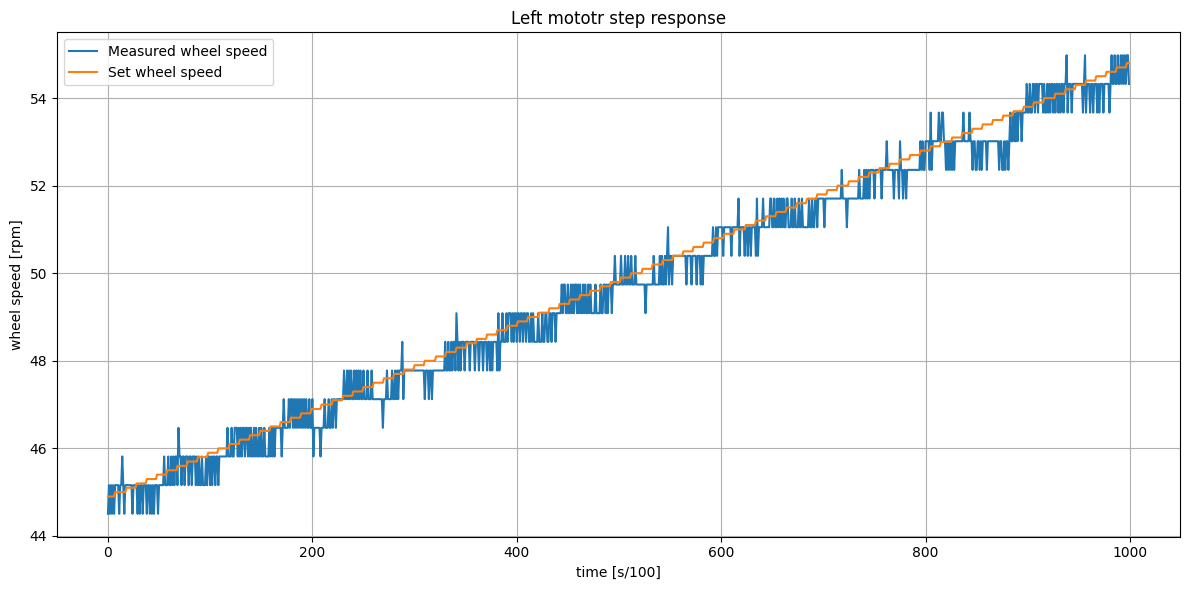

In [33]:
A1, A2, B1, B2 = load_dual_series_csv("../measured_data/right_increment.csv")
#buffer size was 1000 samples, so we do not have whole response xD
plot_series(A1, A2, labels=["Measured wheel speed", "Set wheel speed ", "B1", "B2"], title="Right motor incremental response",x_label = "time [s/100]", y_label = "wheel speed [rpm]" )

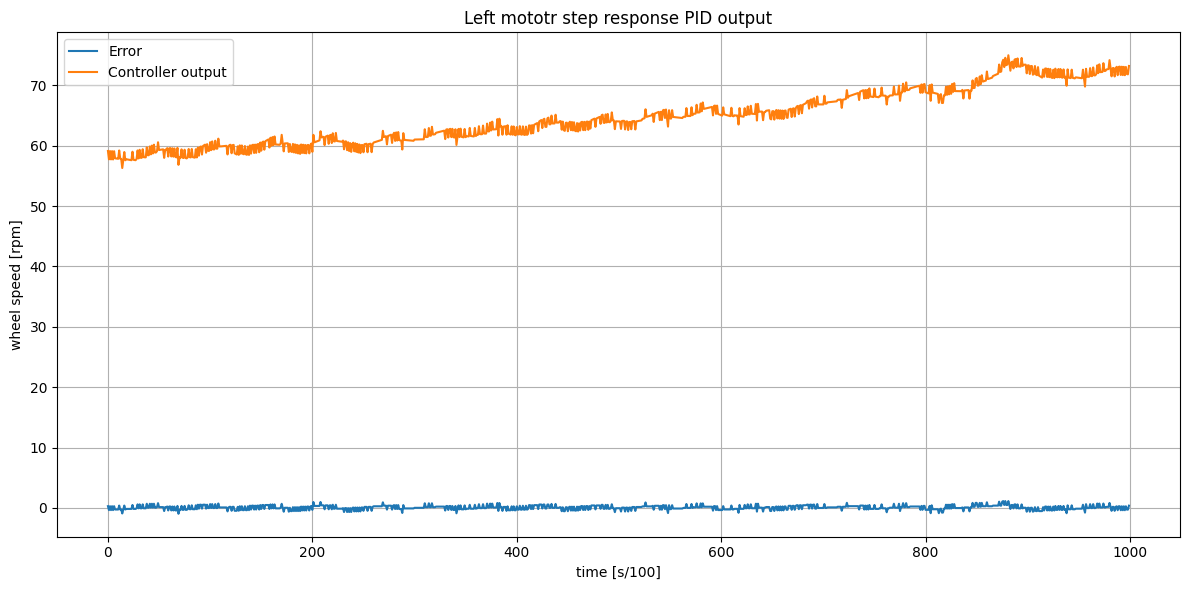

In [35]:
plot_series(B1, B2, labels=["Error", "Controller output"], title="Left mototr step response PID output",x_label = "time [s/100]", y_label = "wheel speed [rpm]" )

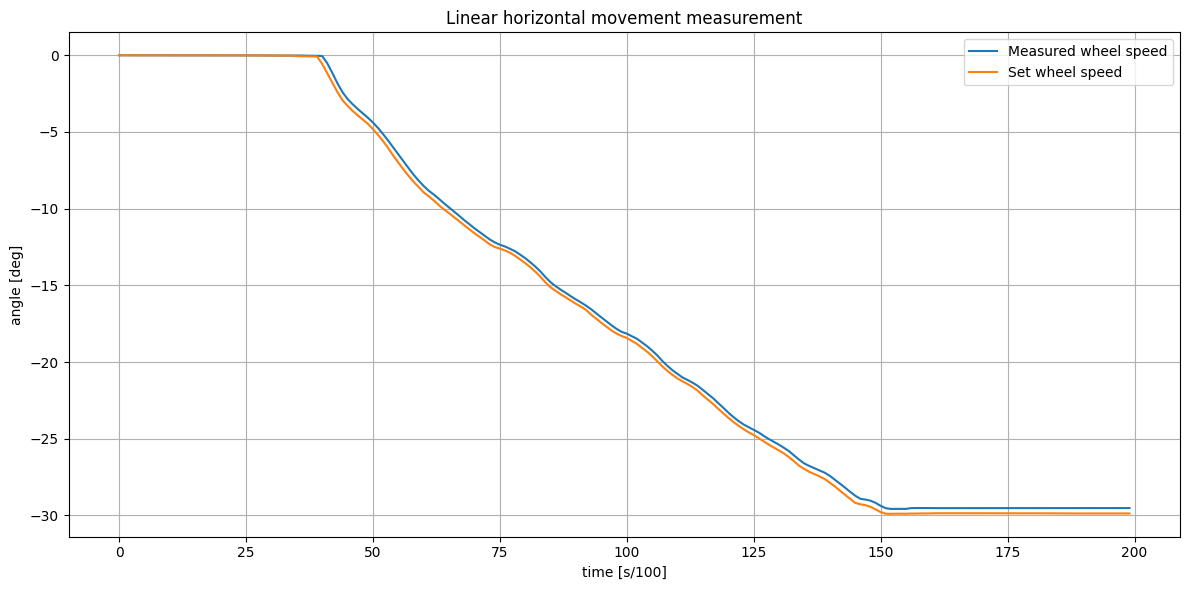

In [46]:
A1, A2, B1, B2 = load_dual_series_csv("../measured_data/horizontal_movement.csv")
#buffer size was 1000 samples, so we do not have whole response xD
cumsumB1 = np.cumsum(B1[0:200])
cumsumB2 = np.cumsum(B2[0:200])
plot_series(cumsumB1, cumsumB2 ,labels=["Measured wheel speed", "Set wheel speed "], title="Linear horizontal movement measurement",x_label = "time [s/100]", y_label = "angle [deg]" )

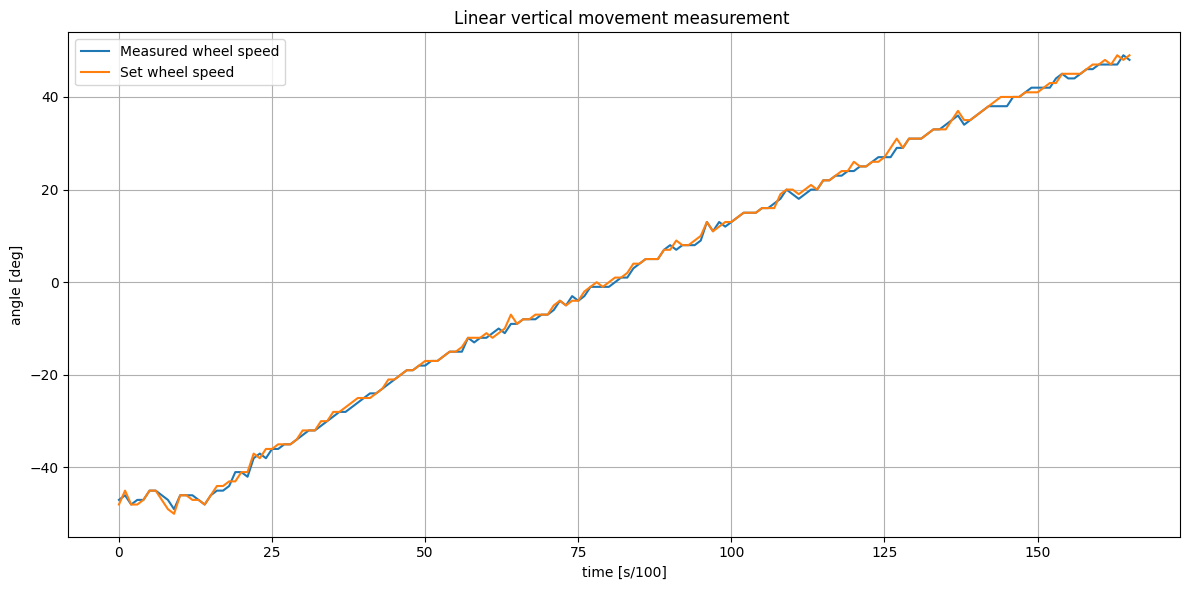

In [47]:
A1, A2, B1, B2 = load_dual_series_csv("../measured_data/vertical_movement.csv")
#buffer size was 1000 samples, so we do not have whole response xD
plot_series(A1, A2, labels=["Measured wheel speed", "Set wheel speed "], title="Linear vertical movement measurement ",x_label = "time [s/100]", y_label = "angle [deg]" )